# Problem set 2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.chdir("/Users/julianacavalcanti/Documents/Year 3/Programming and Numerical Methods for Economics/Python_learning")

!pip install xlrd
from functions import gini



In [3]:
data = pd.read_excel("/Users/julianacavalcanti/Downloads/UNPS_1112_PS2.xls")
print(data.head())

           hhid       wave  year  region   district           county  urban  \
0    1013000204  2011-2012  2012       1  KALANGALA         KYAMUSWA      0   
1    1013000206  2011-2012  2012       1    KAMPALA  RUBAGA DIVISION      0   
2    1013000210  2011-2012  2012       1  KALANGALA         KYAMUSWA      0   
3    1013000212  2011-2012  2012       4   KYEGEGWA            KYAKA      0   
4  101300021302  2011-2012  2012       1      MPIGI         MAWOKOTA      0   

   year_surv  month_surv  head_gender  ...       income   wage_labor  \
0       2012           3          1.0  ...   717.277761          NaN   
1       2012           9          1.0  ...  1839.529498   949.476802   
2       2012           2          1.0  ...    91.623072          NaN   
3       2012           3          1.0  ...  2617.802047  1989.529555   
4       2012           4          2.0  ...   811.518634          NaN   

   business_inc   other_inc  agriculture_inc  livestock_inc       wealth  \
0    717.277761 

## Exercise 1


### a)


In [4]:
# To count the dupicaled we use data[].duplicated().sum() commands

dupe_ids = data['hhid'][data['hhid'].duplicated()]
print(dupe_ids)

duplicates = data['hhid'].duplicated().sum()
print(f"Number of duplicate households: {duplicates}")



print("Number of observations:", data.shape) #To count the number of observations we used .shape()


Series([], Name: hhid, dtype: int64)
Number of duplicate households: 0
Number of observations: (2613, 30)


### b)

In [6]:
# Use to find summarry statistics .describe
summary_statistics = data[['head_gender', 'head_age', 
                           'familysize', 'consumption', 'income', 'wealth']].describe()
print("Summary statistics of the selected variables: \n")
summary_statistics

Summary statistics of the selected variables: 



,head_gender,head_age,familysize,consumption,income,wealth
count,2597.000000,2597.000000,2597.000000,2613.000000,2613.000000,2613.000000
mean,1.314209,46.068156,7.480554,1803.792687,1860.075795,4912.698146
std,0.464289,15.068960,3.712526,1308.742941,2607.517603,8359.886497
min,1.000000,14.000000,1.000000,250.305506,27.486921,0.000000
25%,1.000000,34.000000,5.000000,918.324958,471.204368,720.019916
50%,1.000000,44.000000,7.000000,1426.614855,1061.194208,2108.598380
75%,2.000000,56.000000,9.000000,2296.859516,2234.800590,5221.939857
max,2.000000,100.000000,33.000000,8369.898484,52137.736864,76396.339917


##### Most households are male led with an average age of 46 and a family size of about 7.5 members. Consumption and income appear moderately skewed with high variability. There are a few missing observations in consumption, income, and wealth as there are less observations than 2613. The wide range between the median and maximum values especially for income (max 52,138) and wealth (max 76,396), suggests the presence of potential outliers.

### c)


In [10]:
# Using the (data['head_gender'] == 2).astype(int) command
data['female_head'] = (data['head_gender'] == 2).astype(int)



#To create the percentage of female family heads we find the mean and multiply it by 100
percentage_female_heads = data['female_head'].mean() * 100
print(f"{percentage_female_heads:.4f}% : of households have a female head.")

31.2285% : of households have a female head.


### d)


In [11]:

# Using .groupby('female_head') we can work out the mean of male and female led families for 
# for consumption, family size and age of the head of the families.
grouped_stats = data.groupby('female_head')[['consumption', 'familysize', 'head_age']].mean()
print("The mean depending on male or female led families: \n")
grouped_stats


The mean depending on male or female led families: 



,consumption,familysize,head_age
female_head,,,
0,1899.392959,7.720943,44.388546
1,1593.261206,6.955882,49.734069


##### For consumption we notice that the mean for male led families (when variable values is 0) is around 306 units higher, as well as the family sizes are also larger in male families. However, the average age of the head of the families when the head is female is around 5 years higher.


## Exercise 2

### a)

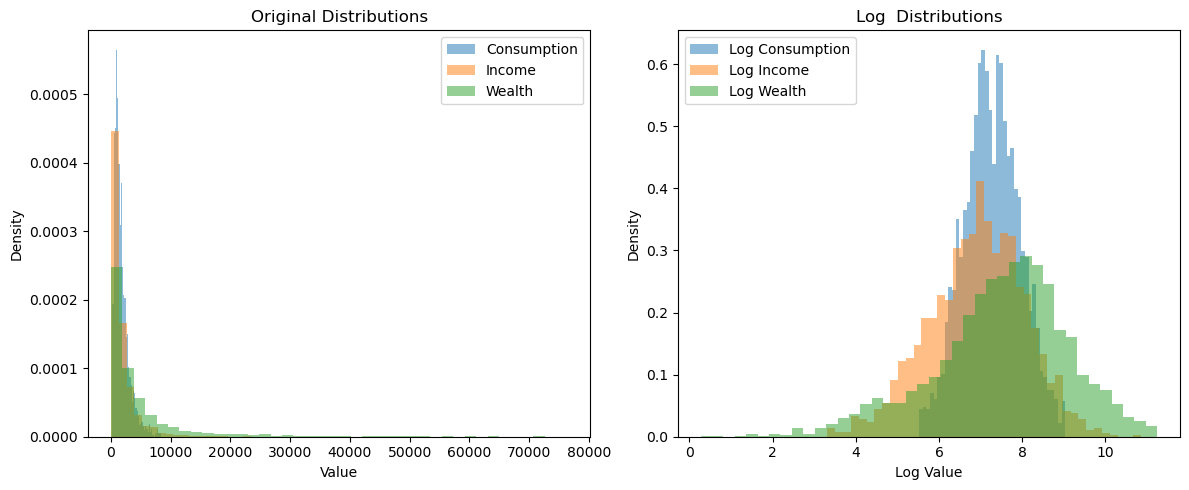

In [13]:
data = data[(data["wealth"] != 0)]
# Can creat log of our variables using np.log and we add a plus 1 to avoid errors
data['log_c']   = np.log(data['consumption'])
data['log_inc'] = np.log(data['income'])
data['log_w']   = np.log(data['wealth'])

plt.figure(figsize=(12, 5))

# To compare both distributions first we plot the original distributions
plt.subplot(1, 2, 1)
plt.hist(data['consumption'], bins=40, alpha=0.5, label='Consumption', density=True)
plt.hist(data['income'], bins=40, alpha=0.5, label='Income', density=True)
plt.hist(data['wealth'], bins=40, alpha=0.5, label='Wealth', density=True)
plt.title('Original Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Then the Log distributions
plt.subplot(1, 2, 2)
plt.hist(data['log_c'], bins=40, alpha=0.5, label='Log Consumption', density=True)
plt.hist(data['log_inc'], bins=40, alpha=0.5, label='Log Income', density=True)
plt.hist(data['log_w'], bins=40, alpha=0.5, label='Log Wealth', density=True)
plt.title('Log  Distributions')
plt.xlabel('Log Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


##### Both distributions look like normal distributions. Log of consumption less so due to the dip in frequency of values in what would be the median and mean (middle) and lack of tails. Log of income is also a symetric bell curve but it seems more shallow than a normal distribution.

##### Inequality is higher in income than in consumption since the range is larger than in the log of consumtion distribution.



### b)


In [14]:
#We can create a new variable to store the values of the variances useing .var 
var_log_c   = data['log_c'].var()
var_log_inc = data['log_inc'].var()
var_log_w   = data['log_w'].var()

print("Variance of log consumption:", var_log_c)
print("Variance of log income:", var_log_inc)
print("Variance of log wealth:", var_log_w)


Variance of log consumption: 0.44656700596602805
Variance of log income: 1.3388572379219112
Variance of log wealth: 2.6771875562232976
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


| Variance of log() | Uganda | US |
| ------|---------------|---------------- 
| Consumption | 0.4466 | 0.79 |
| Income | 1.3389 | 0.97 | 
| Wealth | 2.6772 | 2.11 |



### c)

In [16]:
# Again we use groupby and .mean()
rural_urban_stats = data.groupby('urban')[['consumption', 'income', 'wealth']].mean()
print("Average of consumption, income and wealth for urban (1) and rural (0) areas: \n") 
rural_urban_stats


Average of consumption, income and wealth for urban (1) and rural (0) areas: 



,consumption,income,wealth
urban,,,
0,1627.313595,1714.775035,4533.857241
1,2523.968738,2456.992260,6711.015029


### d)

In [18]:
# Again we use groupby and .var() for our log values
urban_rural_log_variance = data.groupby('urban')[['log_c', 'log_inc', 'log_w']].var()
print("Variance of log of consumption, income and wealth for urban (1) and rural (0) areas: \n")
urban_rural_log_variance 

Variance of log of consumption, income and wealth for urban (1) and rural (0) areas: 



,log_c,log_inc,log_w
urban,,,
0,0.412732,1.345282,2.388743
1,0.435240,1.101915,3.920238


### e)

##### The gini coefiecient is a measure oof inequality, which infer upon from a lorenz curve. The gini coeficient is calculated using firstly a 45 degree line which illustrates perfect distribution and we calculate the area between that and the convex Lorenz curve (A, that shows the actual distribution), and divide it by the are under the 45 degree line to the axes (A + B). The equation is shown below: 

$Gini = \frac{A}{A+B}$

In [19]:
# Here we use a gini function to calculate the gini coeficient
gini_c = gini(data['consumption'].dropna())
gini_inc = gini(data['income'].dropna())
gini_w = gini(data['wealth'].dropna())

print("Gini Coefficient - Consumption:", round(gini_c, 3))
print("Gini Coefficient - Income:", round(gini_inc, 3))
print("Gini Coefficient - Wealth:", round(gini_w, 3))



Gini Coefficient - Consumption: 0.364
Gini Coefficient - Income: 0.556
Gini Coefficient - Wealth: 0.655


### f)

In [18]:

# We first need to drop missing wealth values
wealth = data['wealth'].dropna().sort_values()
n = len(wealth)

# We then work out total wealth
total_wealth = wealth.sum()

# Bottom 50%
bottom_50 = int(0.5 * n)
bottom_50_share = wealth.iloc[:bottom_50].sum() / total_wealth

# Top 10%
top_10 = int(0.9 * n)
top_10_share = wealth.iloc[top_10:].sum() / total_wealth

# Top 5%
top_5 = int(0.95 * n)
top_5_share = wealth.iloc[top_5:].sum() / total_wealth

# Top 1%
top_1 = int(0.99 * n)
top_1_share = wealth.iloc[top_1:].sum() / total_wealth

print(f"Bottom 50% wealth share: {bottom_50_share:.3f}")
print(f"Top 10% wealth share: {top_10_share:.3f}")
print(f"Top 5% wealth share: {top_5_share:.3f}")
print(f"Top 1% wealth share: {top_1_share:.3f}")


Bottom 50% wealth share: 0.082
Top 10% wealth share: 0.511
Top 5% wealth share: 0.352
Top 1% wealth share: 0.119


##### In general when referring to Gini coeficients we talk about the gini coefcient of income, which mesures the distribution of income. Although we can observe a large variability for the gini coeficient in rich countries has a lot of variablility, we can observe a general range. Ireland has a gini coeficient of 29.9 and Finland has 27.9, whilst we can observe gini coeficients in the fourties for more unequal rich counrties such as the United States (US). Keeping in mind that the data for Uganda was taken in 2012, we can state that inequality in Uganda is relatively large compared to the richer countries, as the income gini coeficient is 0.556. 

### h)

##### Due to the lack of reliable income data in many African economies, because of large shares of the workforce in informal or activities, researchers often rely on household consumption to measure inequality. Alvaredo and Gasparini (2005) note that income among poorer households is highly volatile and difficult to capture accurately, whereas consumption tends to be smoothed over time through borrowing and self-production (our resutls show consumption inequality of only 34%).

##### Consumption may also better reflect broader notions of well-being. As Amartya Sen has argued, poverty is not merely a lack of money but a deprivation of capability. In that spirit, what individuals are able to consume can be seen as closer to their realised potential. If a poorer household is able to buy similar goods and services as a richer one (top 10% own 51% of wealth), then inequality may be less stark than income gini coeficient would suggest. Alvaredo and Gasparini (2005) emphasise this point by positioning consumption as a representative for effective living standards.

##### However, there are clear limitations to this approach. Measuring inequality through consumption may understate structural disparities, since wealthier households typically save a larger share of their income and accumulate assets that do not appear in expenditure data. As a result, a low consumption Gini coefficient can conceal large differences in opportunity.

##### The policy impication is clear, while consumption better measure current welfare, income and wealth distributions better capture opportunity structure. As developing countries, 


### g)

## Exercise 3

### a)

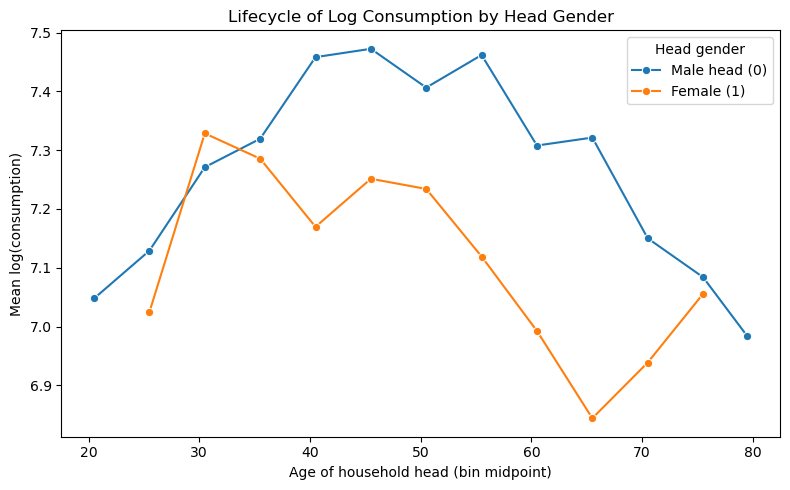

In [32]:
# Need to seperate the data to ONLY illustrate households where the age of the 
# head of the familt is 18 and above, and 80 amd below
data_18_80 = data.loc[data['head_age'].between(18, 80, inclusive='both')].copy()

# Assuming head_gender variable is coded as 1=male and 2=female
data_18_80['female_head'] = (data_18_80['head_gender'] == 2).astype(int)


# Define age bins
bins = list(range(18, 81, 5))  # 18–80 in 5-year steps
# ensure the right-closed end captures age 80 by adding a final edge
if bins[-1] != 81:
    bins = bins + [81]
data_18_80['age_bin'] = pd.cut(data_18_80['head_age'], bins=bins, right=False, include_lowest=True)

# Drop bins with too few households (per gender), e.g., < 15 obs
counts = data_18_80.groupby(['female_head', 'age_bin'], observed=True).size().reset_index(name='n')
keep = counts[counts['n'] >= 15][['female_head', 'age_bin']]
data_18_80 = data_18_80.merge(keep.assign(keep=1), on=['female_head', 'age_bin'], how='left')
data_18_80 = data_18_80[data_18_80['keep'] == 1].drop(columns='keep')


# We then find the means and plot
agg = (
    data_18_80.groupby(['age_bin', 'female_head'], observed=True)['log_c']
      .mean()
      .reset_index()
)

# Convert age_bin to midpoints for a smooth x-axis
agg['age_mid'] = agg['age_bin'].apply(lambda x: (x.left + x.right) / 2)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=agg.sort_values('age_mid'),
    x='age_mid', y='log_c', hue='female_head', marker='o', errorbar = None
)
plt.xlabel('Age of household head (bin midpoint)')
plt.ylabel('Mean log(consumption)')
plt.title('Lifecycle of Log Consumption by Head Gender')
plt.legend(title='Head gender', labels=['Male head (0)', 'Female (1)'])
plt.tight_layout()
plt.show()


### b)

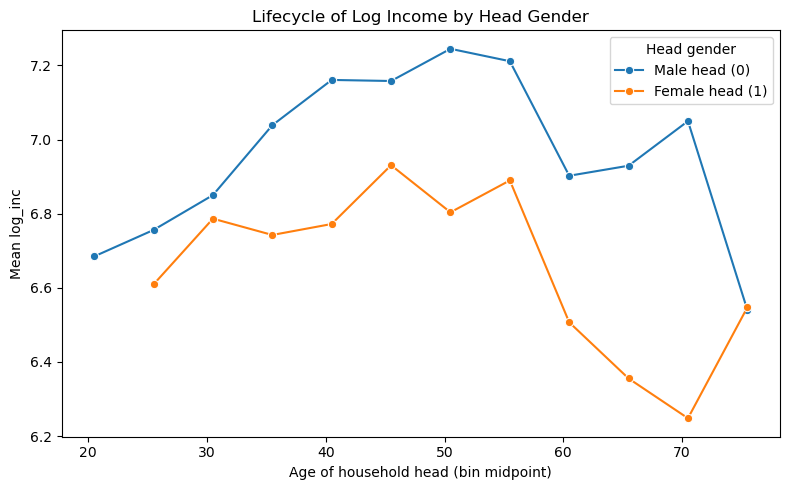

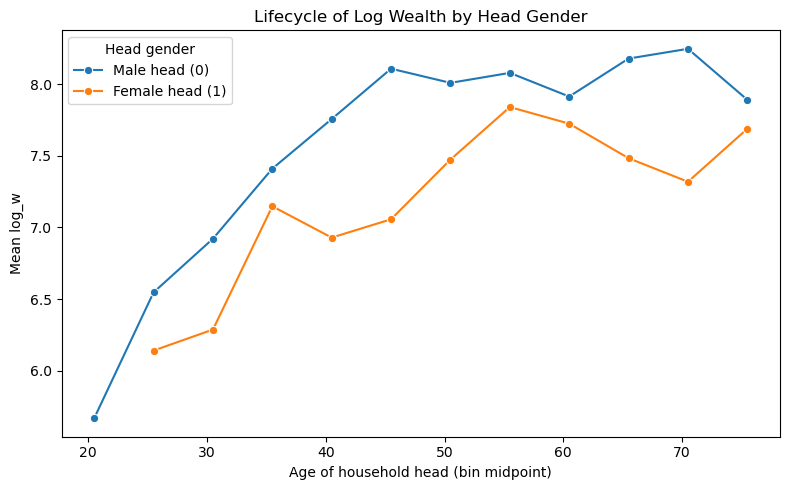

In [33]:
def plot_lifecycle(df, log_var, title):
    # Need to seperate the data to ONLY illustrate households where the age of the 
    # head of the familt is 18 and above, and 80 amd below
    df = df.loc[df['head_age'].between(18, 80, inclusive='both')].copy()

    
    df['female_head'] = (df['head_gender'] == 2).astype(int)

   
    # Define age bins
    bins = list(range(18, 81, 5))  # 18–80 in 5-year steps
 
    df['age_bin'] = pd.cut(df['head_age'], bins=bins, right=False, include_lowest=True)

    
    counts = df.groupby(['female_head', 'age_bin'], observed=True).size().reset_index(name='n')
    keep = counts[counts['n'] >= 15][['female_head', 'age_bin']]
    df = df.merge(keep.assign(keep=1), on=['female_head', 'age_bin'], how='left')
    df = df[df['keep'] == 1].drop(columns='keep')

    # We then find the means and plot
    agg = (
        df.groupby(['age_bin', 'female_head'], observed=True)[log_var]
          .mean()
          .reset_index()
    )

    # Convert age_bin to midpoints for a smooth x-axis
    agg['age_mid'] = agg['age_bin'].apply(lambda x: (x.left + x.right) / 2)

    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=agg.sort_values('age_mid'),
        x='age_mid', y=log_var, hue='female_head', marker='o', errorbar = None
    )
    plt.xlabel('Age of household head (bin midpoint)')
    plt.ylabel(f'Mean {log_var}')
    plt.title(title)
    plt.legend(title='Head gender', labels=['Male head (0)', 'Female head (1)'])
    plt.tight_layout()
    plt.show()

# Plot for log income
plot_lifecycle(data, 'log_inc', 'Lifecycle of Log Income by Head Gender')

# Plot for log wealth
plot_lifecycle(data, 'log_w', 'Lifecycle of Log Wealth by Head Gender')


### c)

##### Overall: For all variables the growth/decline rates tend to be lower for female heads meaning that household consumption, income and wealth are more stable when the household head is female (on average).

##### Consumption: For male heads the shape of the curve is an inverted u meaning that consumption increases at a rapid rate, then plateaus then decreases at a rapid rate, the age range at which consumption starts falling (negative growth) is about 43-47. For female heads it is a simmilar shape but with an increase in consumption for older heads of households (at age range 63-67)

##### Income: For male heads income increases at a steady rate until the ages of 53-67 then decreases slightly. Average income growth under femaleheads is similar but with a fast increase at early ages 18-27

##### Wealth: For both male and female heads there is a step increase in the growth rates until the 53-57 age group where it plateaus then we see a decrease, for male heads this happens at the 68-72 age group but for female heads at 53-57.

##### Wealth grows rapidly then plataeus for both male and female heads, again the growth rate is lower for female heads compared to male heads. The age range at which the average growth rate plateaus is the same, 45-59.